# Importing Relevant Liabraries

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading the data

In [13]:
data1=pd.read_csv('diabetes2.csv')
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Exploring the Data

In [14]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0    0.651042
1    0.348958
Name: Outcome, dtype: float64

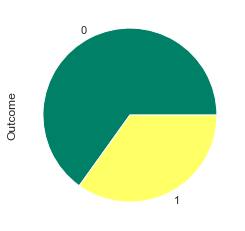

In [15]:
data1['Outcome'].value_counts().plot.pie(cmap='summer')
data1['Outcome'].value_counts(normalize=True)

##### Around 65% of users are healthy ( non-Diabetic)

C:\Users\Avneesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Avneesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Avneesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

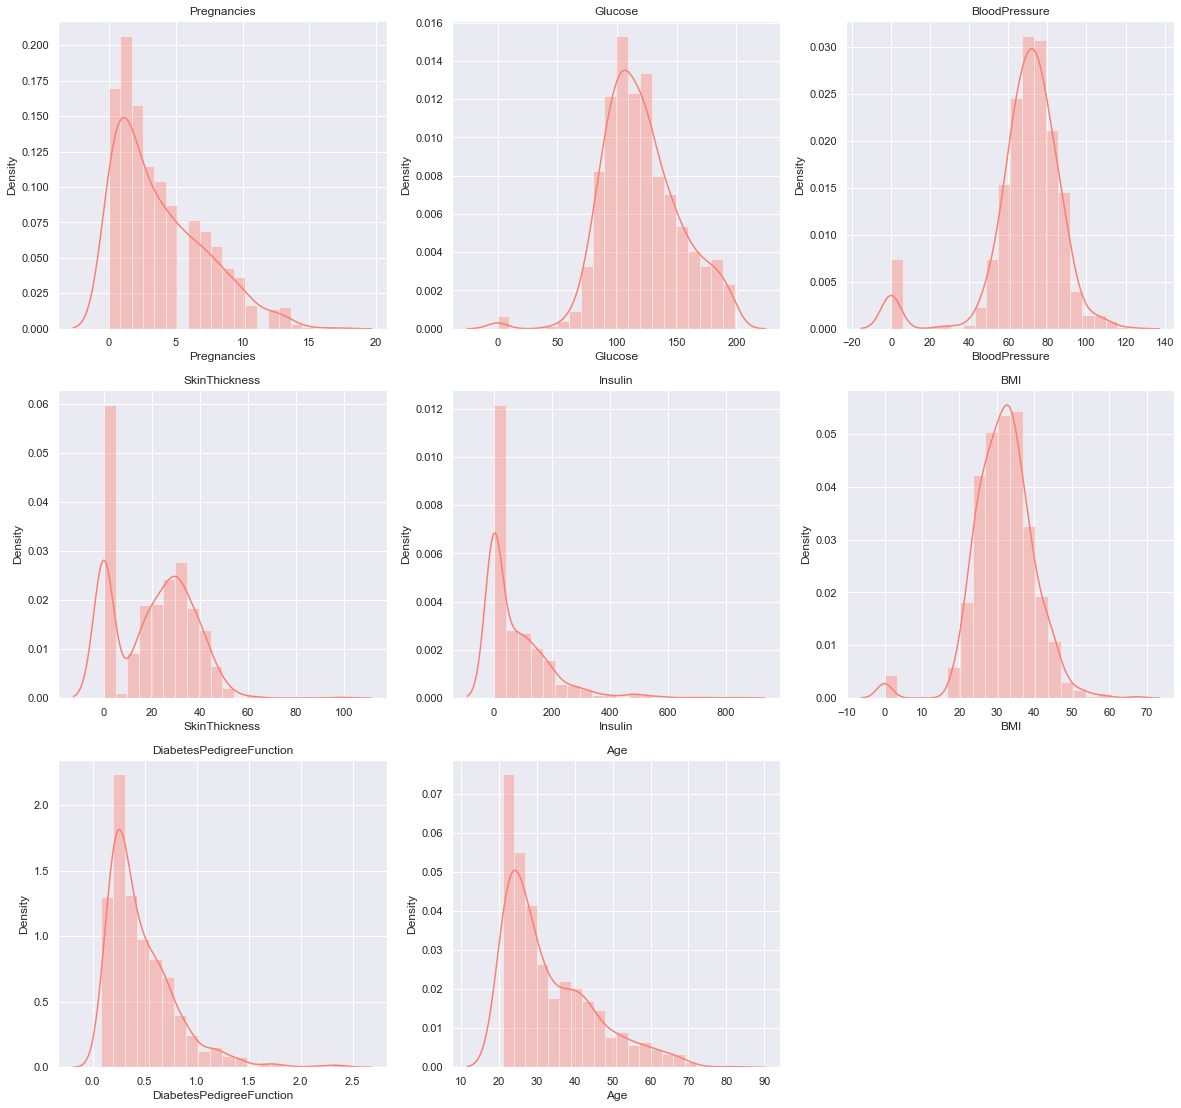

In [17]:
N_col = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(20,60))
plotnum=1
for col in N_col:
    ax=plt.subplot(9,3,plotnum)
    sns.distplot(data1[col], bins=20,color='Salmon')
    plt.title(col)
    plotnum+=1
plt.show()

# Preprocessing the Data

In [18]:
data1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
#Many column seems to have min value zero let us observe the Proportion of zero's in each column
print("Proportion of missing values")
missing_percentage = (data1==0).sum()*100/data1.shape[0]
missing_percentage

Proportion of missing values


Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

In [20]:
#let us observe if there is any dependency of missing values in skin_thickness and other columns
# meaning whenever skin_thickness cell is 0 which other feature is 0 in the same row
bp_df = data1.loc[data1['SkinThickness']==0]
print("Count of zeros in blood_pressure:", (bp_df['BloodPressure']==0).sum())
print("Count of zeros in skin_thickness:", (bp_df['SkinThickness']==0).sum())
print("Count of zeros in insulin:", (bp_df['Insulin']==0).sum())

Count of zeros in blood_pressure: 33
Count of zeros in skin_thickness: 227
Count of zeros in insulin: 227


In [21]:
#let us observe if there is any dependency of missing values in insulin and other columns
# meaning whenever Insulin cell is 0 which other feature is 0 in the same row
bp_df = data1.loc[data1['Insulin']==0]
print("Count of zeros in blood_pressure:", (bp_df['BloodPressure']==0).sum())
print("Count of zeros in skinfold_thickness:", (bp_df['SkinThickness']==0).sum())
print("Count of zeros in insulin:", (bp_df['Insulin']==0).sum())

Count of zeros in blood_pressure: 35
Count of zeros in skinfold_thickness: 227
Count of zeros in insulin: 374


In [22]:
#An important point here, zeros in Pragnancy column indicates a feature which could not considered as Missing Value 
#rather zeros present in rest of the columns are to be considered as a missing value 
#hence we will go ahead replacing zeros to NaN.
m_col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
colnum=1
for col in m_col:
    data1[col]=data1[col].replace(0,np.nan)
    colnum+=1
data1.isnull().sum()/data1.shape[0]

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

### Load KNNImputer

In [23]:
# Missing records in insulin, skinfthickness are almost 50%, 30% respectively we can not dorp the the column.
# Now that we have Null values in the columns- we can now impute the missing values using KNN Imputer.
import sklearn
from sklearn.impute import KNNImputer,SimpleImputer

In [44]:
imputer = KNNImputer(n_neighbors=14)
k_data1=imputer.fit_transform(data1)
data2=pd.DataFrame(k_data1,columns=data1.columns)
data2.shape

(768, 9)

In [25]:
data2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Dealing with Outliers

In [26]:
column=['Age','DiabetesPedigreeFunction','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Insulin']
data3 = data2[
#dealing with more than 99 percentile values    
            (data2['Age'] <= data2['Age'].quantile(.99)) &
            (data2['DiabetesPedigreeFunction'] <= data2['DiabetesPedigreeFunction'].quantile(.99)) &
            (data2['Pregnancies'] <= data2['Pregnancies'].quantile(.99)) &
            (data2['Glucose'] <= data2['Glucose'].quantile(.99)) &
            (data2['BloodPressure'] <= data2['BloodPressure'].quantile(.99)) &
            (data2['SkinThickness'] <= data2['SkinThickness'].quantile(.99)) &
            (data2['Insulin'] <= data2['Insulin'].quantile(.99)) &
            (data2['BMI'] <= data2['BMI'].quantile(.99)) &
    
#dealing with the less than 1 percentile values    
            (data2['Age'] >= data2['Age'].quantile(.01)) &
            (data2['DiabetesPedigreeFunction'] >= data2['DiabetesPedigreeFunction'].quantile(.01)) &
            (data2['Pregnancies'] >= data2['Pregnancies'].quantile(.01)) &
            (data2['Glucose'] >= data2['Glucose'].quantile(.01)) &
            (data2['BloodPressure'] >= data2['BloodPressure'].quantile(.01)) &
            (data2['SkinThickness'] >= data2['SkinThickness'].quantile(.01)) &
            (data2['Insulin'] >= data2['Insulin'].quantile(.01)) &
            (data2['BMI'] >= data2['BMI'].quantile(.01)) 
    
             ]

data3.describe()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,3.861314,121.720855,72.222211,28.896976,149.015850,32.212242,0.455188,32.868613,0.350365
std,3.266842,29.023337,11.256226,8.276240,79.119531,6.207198,0.289550,11.226807,0.477433
min,0.000000,68.000000,44.000000,10.000000,29.000000,19.500000,0.100000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,23.000000,92.000000,27.600000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.071429,140.000000,32.000000,0.365000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,34.000000,182.000000,36.000000,0.607000,40.000000,1.000000
max,13.000000,196.000000,106.000000,51.000000,510.000000,50.000000,1.698000,67.000000,1.000000


In [27]:
data=data3.reset_index()

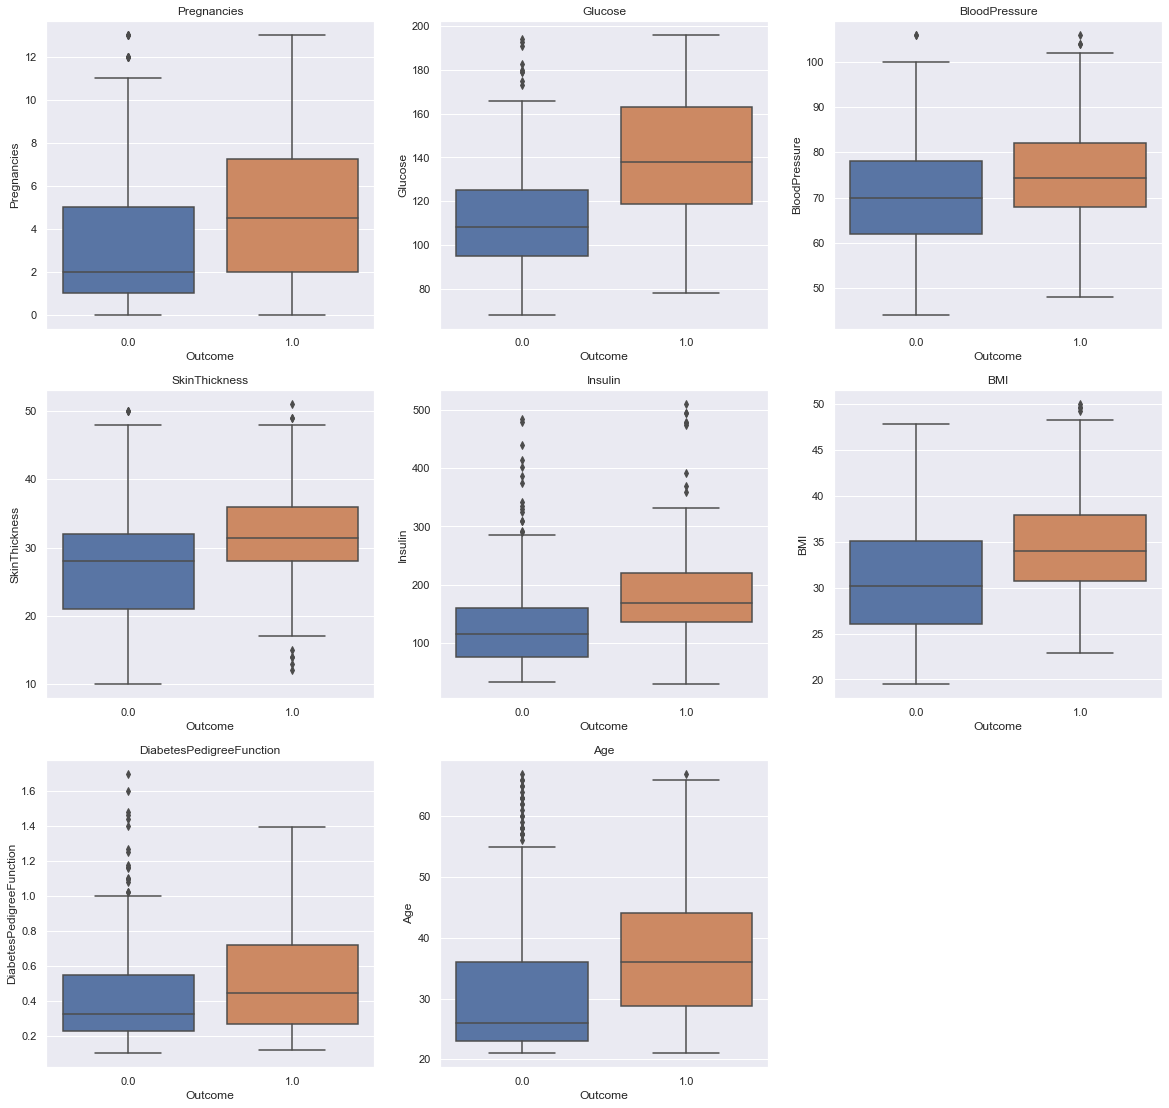

In [28]:
plt.figure(figsize=(20,60))
plotnum=1
for col in N_col:
    ax=plt.subplot(9,3,plotnum)
    sns.boxplot(y=data[col],x=data['Outcome'])
    plt.title(col)
    plotnum+=1
plt.show()

### Checking for Correlation

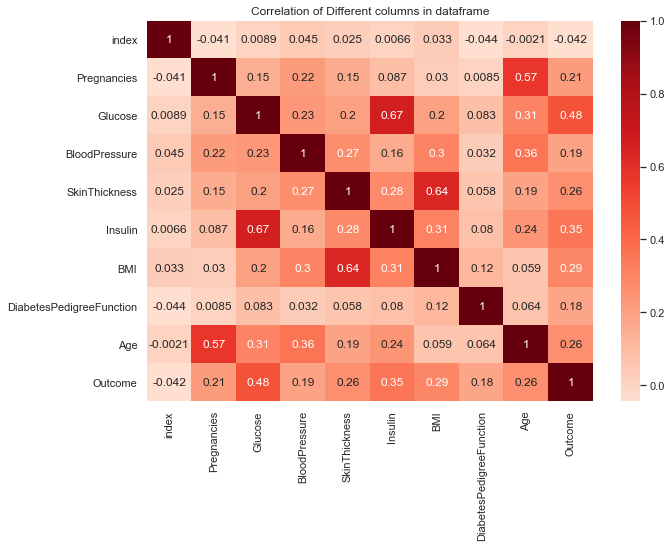

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, cmap='Reds',center = 0.4)
plt.title('Correlation of Different columns in dataframe')
plt.show()

##### Insulin and Glucose are most correlated

In [30]:
# defining the inputs and targests
x1=data.drop('Outcome',axis=1)
y=data['Outcome']

In [31]:
# Scaling Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x1)

StandardScaler()

### Splitting DataSet into Train and Test:

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size = 0.2,random_state=100)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_curve,auc, plot_confusion_matrix

In [34]:
y_test.count(),y_train.count()

(137, 548)

#  Logistic Regression 

In [35]:
log_model = LogisticRegression(solver='liblinear')
log_model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [36]:
y_train_pred=log_model.predict(x_train)
y_test_pred=log_model.predict(x_test)

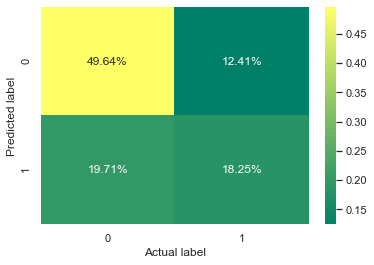

In [37]:
res= confusion_matrix(y_test, y_test_pred)
sns.heatmap(res/np.sum(res), annot=True, fmt='.2%',cmap='summer')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

In [38]:
def Model_Performance(test,pred):
    precision = precision_score(test,pred)
    recall = recall_score(test,pred)
    f1 = f1_score(test,pred)
    print('1. Confusion Matrix:\n',confusion_matrix(test, pred))
    print("\n2. Accuracy Score:", round(accuracy_score(test, pred)*100,2),"%")
    print("3. Precision:", round(precision*100,2),"%")
    print("4. Recall:",round(recall*100,2),"%" )
    print("5. F1 Score:",round(f1*100,2),"%" )
    print("6. clasification report:\n",classification_report(test, pred))

### Training Result

In [39]:
Model_Performance(y_train,y_train_pred)

1. Confusion Matrix:
 [[319  41]
 [ 85 103]]

2. Accuracy Score: 77.01 %
3. Precision: 71.53 %
4. Recall: 54.79 %
5. F1 Score: 62.05 %
6. clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       360
         1.0       0.72      0.55      0.62       188

    accuracy                           0.77       548
   macro avg       0.75      0.72      0.73       548
weighted avg       0.76      0.77      0.76       548



## Testing Result

In [40]:
Model_Performance(y_test,y_test_pred)

1. Confusion Matrix:
 [[68 17]
 [27 25]]

2. Accuracy Score: 67.88 %
3. Precision: 59.52 %
4. Recall: 48.08 %
5. F1 Score: 53.19 %
6. clasification report:
               precision    recall  f1-score   support

         0.0       0.72      0.80      0.76        85
         1.0       0.60      0.48      0.53        52

    accuracy                           0.68       137
   macro avg       0.66      0.64      0.64       137
weighted avg       0.67      0.68      0.67       137



In [41]:
model_f=pd.DataFrame()
model_f['Features'] = list(x_train.columns)
model_f['importance'] = list(log_model.coef_[0])

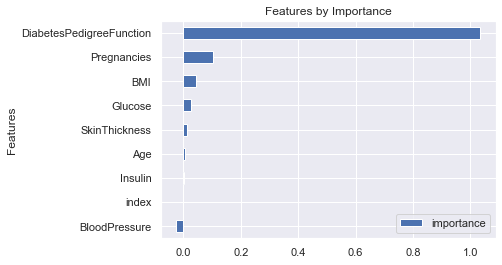

In [42]:
imp_check=pd.DataFrame(model_f.sort_values(by='importance'))
imp_check.plot.barh(x='Features',y='importance',title='Features by Importance')
plt.show()

##### DiabetesPredigreeFunction and Pregnencies seems to be the 2 most important feature in determing the outcome
##### BMI and Glucose are also have significant contributions